### Tabla de Contenidos

* [1) Los datos](#losdatos)
    * [1.1) Introduccion](#losdatos)
    * [1.2) Carga del dataset](#Carga)
    * [1.3) Visualizacion del dataset](#Visualizacion)
    * [1.4) Creacion de los sets de validacion](#Validacion)
    * [1.4) Preprocesamiento](#Preprocesamiento)
* [2) Modelizacion ML Clasico](#Tuning-ML)
    * [2.1)Tuning de hiperarametros con ML Clasico](#Tuning-ML)
        * [2.1.1)Baseline con Pycaret](#Pycaret)
            * [2.1.1.1)Model setup](#Pycaret-1)
            * [2.1.1.2Model overview](#Pycaret-2)
        * [2.1.2)GridSearchCV ML Clasico](#MLClasico-Tuning)
            * [2.1.2.1)Regresion Logistica con Ridge](#GS-RL)
            * [2.1.2.2)kNN](#GS-kNN)
            * [2.1.2.3)Decision Tree](#GS-DT)
            * [2.1.2.4)Elastic Net](#GS-EN)
            * [2.1.2.5)Random Forest](#GS-RF)
        * [2.1.3)Conclusiones y resumen de seleccion de hiperparametros ML](#Conclu-tuning)
    * [2.2)Entrenamiento con todo el train (post seleccion de hiperparametros)](#SeleccionModelo-ML)
        * [2.2.1) Entrenamiento de los modelos](#Entrenamiento-ML)
            * [2.2.1.1)Regresion Logistica con Ridge](#TR-RL)
            * [2.1.1.2)kNN](#TR-kNN)
            * [2.1.1.3)Decision Tree](#TR-DT)
            * [2.1.1.4)Elastic Net](#TR-EN)
            * [2.1.1.5)Random Forest](#TR-RF)
        * [2.2.2)Conclusiones finales modelos ML clasico](#Conclu-MLClasico)
* [3) Redes Neuronales](#Redes)
    * [3.1)Preprocesamiento](#Preproc-Redes)
    * [3.2)Seleccion de hiperparametros](#Tuning-Redes)
        * [3.2.1)Modelo 1: HL1: 300 Relu, HL2, 100 Relu, SGD](#Modelo1)
            * [3.2.1.1)Modelo](#Fit1)
            * [3.2.1.2)Learning Curve](#Curve1)
        * [3.2.2)Modelo 2: HL1: 300 Relu, HL2, 100 Relu, ADAM](#Modelo2)
            * [3.2.2.1)Modelo](#Fit2)
            * [3.2.2.2)Learning Curve](#Curve2)
* [4) Seleccion final de modelo y entrenamiento con todo el train](#SeleccionFinal)
    * [4.1.1)Modelo](#ModeloFinal)
    * [4.1.2)Accuracy-Loss Curve](#AccuracyFinal)
* [5) Prediccion del modelo de produccion sobre valores desconocidos (X_test)](#Prediccion)
    * [5.1)Prediccion](#Predi1)
    * [5.2)Guardado del archivo .npy con las predicciones](#Gaurda-npy)
* [6) Guardado del modelo para futuros usos](#Guarda-modelo)

# Parcial 1:  Clasificación de Imágenes con Keras DNN- Dataset: MNIST

# Los Datos <a class="anchor" id="losdatos"></a>

MNIST es una base de datos con 70 mil capturas de dígitos escritos a mano, del 0 al 9.  La misma fue creada en su momento por empleados del *US Census Bureau* de Estados Unidos y por estudiantes con el objetivo de crear un sistema capaz de reconocer los números de los códigos postales.   

La gente de Scikit-Learn guarda una versión a la cual podemos acceder libremente.

Su tarea es la de identificar correctamente nuevos dígitos escritos a mano. Para ello le brindaremos:

- 60 mil imágenes previamente clasificados con su correspondiente etiqueta (0-9)
- 10 mil imágenes sin etiquetar, que Ud. deberá pronosticar. 

Nosotros no hemos quedado con las etiquetas de estas últimas 10 mil imágenes para evaluar sus pronósticos.   

Todas las imágenes tienen una resolución de 28x28 pixels y están en escala de grises, pero **esta vez los datos ya están "planos" es decir que no necesitará efectuar "Flatten" para procesarlos**.

Usted deberá:

**Primera Parte:** 

1- Visualizar las imágenes: debe instrumentar alguna manera que nos permita ver una por una o en grupo las imágenes. Deberá mostrar la imagen y la correspondiente etiqueta. **Tenga en cuenta que esta vez como los datos ya están planos, Ud deberá trasformarlos en una matriz de 28x28 para poder visualizarlos**.   

2- Generar el modelo de **produccion_1**. Para ello deberá efectuar selección de modelo entre los de **Machine Learning Clásico y Redes Neuronales eligiendo el que considere que funcionará mejor**.     

3- Con el modelo de Producción_1 deberá efectuar etiquetar las 10 mil imágenes provistas. Guarde las 10 mil etiquetas generadas como un array de numpy de nombre *suApellido_1.npy*.  

4- La métrica será Accuracy.   

Nota: si lo desea podrá escalar los valores de la escala de grises de cada pixel a [0,1]



**Segunda Parte**:  

Esta segunda parte es similar a la primera pero incluye elementos vistos en la materia **Práctica Profesionalizante 3** y se utilizará para evaluar dicha materia.  

Luego de observar las imágenes, Ud supone que algunos pixels de la misma tienen poca relevancia para determinar qué número está escrito en ellas. 

1- Con los métodos vistos en PP3 (esencialmente filtros) deberá generar un conjunto de **a lo sumo 200 pixels** con los cuales deberá repetir la primera parte.  
2- Al modelo de producción de esta segunda parte deberá llamarlo **produccion_2**  
3- Deberá comparar los resultados obtenidos con los anteriores y anotar cómo funciona mejor.   
4- Finalmente con produccion_2 deberá etiquetar las 10 mil imágenes y guardar las etiquetas como *suApellido_2.npy*  

Nota: Debe documentar su trabajo para luego poder explicarlo, no genere código sin explicaciones!

### Carga y visualizacion del dataset <a class="anchor" id="Carga"></a>

Cargo las librerias necesarias

import numpy as np
import tensorflow as tf
from tensorflow import keras 

Cargo el dataset

In [147]:
import warnings

warnings.simplefilter('ignore')

In [233]:
import matplotlib.pyplot as plt
import numpy as np
X_train=np.load('Alumno/X_MNIST_60_mil.npy', allow_pickle=True)
y_train=np.load('Alumno/Y_MNIST_60_mil.npy', allow_pickle=True)
X_test=np.load('Alumno/X_MNIST_10_mil.npy', allow_pickle=True)
#y_test se lo guardo el profe

784 features, 60000 imagenes forman nuestro X_train

In [234]:
X_train.shape

(60000, 784)

misma cantidad de variables y 10000 imagenes forman parte del X_test

In [150]:
X_test.shape

(10000, 784)

El y_train, es la clasificacion para las 60 mil imagenes

In [151]:
y_train.shape

(60000,)

El y_test, se lo reservo el profesor para contrastar con el predict que haga nuestro modelo sobre el X_test

Las categorias de cada imagen son los numeros del 0 al 9.

In [152]:
np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

El dataset se encuentra casi perfectamente balanceado

In [153]:
np.unique(y_train, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([5919, 6691, 6027, 6137, 5846, 5382, 5938, 6274, 5812, 5974],
       dtype=int64))

### Visualización de los datos <a class="anchor" id="Visualizacion"></a>

Cada registro de X_train, seran los valores de pixeles de cada imagen, representados en escala de blanco-negro (0-255).

In [154]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Como esta en formato matriz, lo convierto a un tensor de 60000 imagenes que contiene matrices de 28x28

In [155]:
X_train = X_train.reshape(60000,28,28)

Idem en el test

In [156]:
X_test = X_test.reshape(10000,28,28)

Mostremos un ejemplo de como se ven las imagenes. Cambiar los valores de la variable Desde y Hasta para ver que imagenes queremos revisar

In [157]:
import matplotlib.pyplot as plt

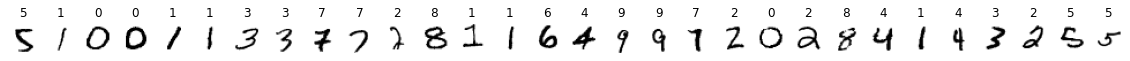

In [158]:
Desde = 0
Hasta = 30
imgs = X_train[Desde:Hasta]
imgs2 = y_train[Desde:Hasta]

rangoPlots = Hasta - Desde
f, axarr = plt.subplots(1,rangoPlots, figsize=(20,20))

for i in range(len(imgs)):    
    axarr[i].imshow(imgs[i], cmap='binary', vmin=0, vmax=255)
    axarr[i].set_title(imgs2[i])
    axarr[i].axis('off')
    

Si queremos comparar como se ven imagenes de un target especifico ademas completar el Target deseado.

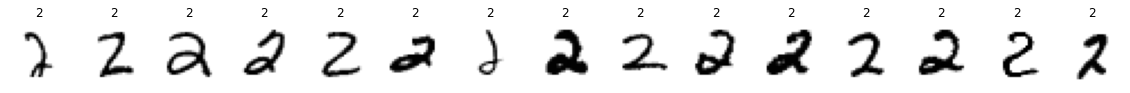

In [159]:
Target = '2'   #Con comillas porque estan en formato str
Desde = 0
Hasta = 15

imgs = X_train[np.where(y_train==Target)]  #le paso los indices de los valores que tienen el mismo target
imgs2 = y_train[y_train==Target]           #Me dejo los valores de target filtrados

imgs = imgs[Desde:Hasta]                   #Aplico el filtro Desde-Hasta en ambos
imgs2 = imgs2[Desde:Hasta]

rangoPlots = Hasta - Desde
f, axarr = plt.subplots(1,rangoPlots, figsize=(20,20))

for i in range(len(imgs)):    
    axarr[i].imshow(imgs[i], cmap='binary', vmin=0, vmax=255)
    axarr[i].set_title(imgs2[i])
    axarr[i].axis('off')

### Sets de validacion <a class="anchor" id="Validacion"></a>

Primero, cargo de nuevo los datos que ya se encontraban en formato plano, como los necesitamos para ingresar a sklearn:

In [160]:
X_train=np.load('Alumno/X_MNIST_60_mil.npy', allow_pickle=True)
y_train=np.load('Alumno/Y_MNIST_60_mil.npy', allow_pickle=True)
X_test=np.load('Alumno/X_MNIST_10_mil.npy', allow_pickle=True)
print('El X_train cuenta con ' + str(X_train.shape[0]) + ' observaciones y ' + str(X_train.shape[1]) + ' features/pixels.')
print('El X_train cuenta con ' + str(y_train.shape[0]) + ' observaciones para la variable y.')
print('El X_test cuenta con ' + str(X_test.shape[0]) + ' observaciones y ' + str(X_test.shape[1]) + ' features/pixels.')

El X_train cuenta con 60000 observaciones y 784 features/pixels.
El X_train cuenta con 60000 observaciones para la variable y.
El X_test cuenta con 10000 observaciones y 784 features/pixels.


Divido el X_train e y_train, para tener validation y usarlos en seleccion de hiperparametros

In [161]:
from sklearn.model_selection import train_test_split

X_val_train,X_val_test,y_val_train,y_val_test=train_test_split(X_train,y_train,test_size=0.2,random_state=123)

### Preprocesamiento: normalizacion del dataset <a class="anchor" id="Preprocesamiento"></a>
Como el valor maximo que puede asumir cualquiera de nuestros pixeles es 255, procedemos a dividir tanto X_train como X_test por ese valor para obtener asi un dataset entre 0 y 1

In [162]:
print(X_val_train.shape)
print(X_val_test.shape)
print(y_val_train.shape)
print(y_val_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [163]:
np.max(X_train)

255.0

In [165]:
X_val_train = X_val_train / 255
X_val_test = X_val_test / 255
X_train = X_train / 255
X_test = X_test / 255

Chequeamos

In [166]:
print(X_train.max())
print(X_train.min())

1.0
0.0


## Modelización - Seleccion de hiperparametros <a class="anchor" id="Tuning-ML"></a>

### Baseline con AutoML Pycaret <a class="anchor" id="Pycaret"></a>

In [17]:
from pycaret.classification import *

In [19]:
df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(y_train, columns=['Target'])
df = pd.concat([df1, df2], axis=1)
df.shape

(60000, 785)

#### PyCaret - Model Setup <a class="anchor" id="Pycaret-1"></a>

In [20]:
clf=setup(data=df,target='Target')

,Description,Value
0,session_id,5854
1,Target,Target
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9"
4,Original Data,"(60000, 785)"
5,Missing Values,False
6,Numeric Features,759
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


#### PyCaret - Overview <a class="anchor" id="Pycaret-2"></a>

In [25]:
best_specific = compare_models(include = ['lr','knn','dt','svm','ridge','rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9674,0.9949,0.9669,0.9678,0.9674,0.9638,0.9638,207.4240
rf,Random Forest Classifier,0.9654,0.9987,0.9650,0.9654,0.9653,0.9615,0.9615,14.8400
lr,Logistic Regression,0.9043,0.9905,0.9029,0.9043,0.9041,0.8937,0.8937,113.9010
svm,SVM - Linear Kernel,0.8780,0.0000,0.8764,0.8840,0.8784,0.8644,0.8650,32.5530
dt,Decision Tree Classifier,0.8623,0.9236,0.8603,0.8623,0.8621,0.8469,0.8469,7.4950
ridge,Ridge Classifier,0.8509,0.0000,0.8481,0.8522,0.8494,0.8343,0.8348,0.7930


## Modelizacion clasica con GridSearchCV - Tuning de hiperparametros <a class="anchor" id="MLClasico-Tuning"></a>

In [167]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

### Modelización Regresión Logística Ridge <a class="anchor" id="GS-RL"></a>

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
# Creamos el modelo con los parámetros que no cambiarán, observe que no le pasamos el valor de C de regulrización
Log_Ridge=LogisticRegression(penalty='l2', max_iter=10000, tol=0.0001) 

# Armamos el diccionario con el  nombre y valores para los Hiperparámetros
parametros_RL = {'C':[0.01,0.1,1,10,100]}   

# Armamos el GridSearchCV
grid_RL = GridSearchCV(estimator = Log_Ridge,param_grid = parametros_RL,scoring = 'accuracy', cv = 3, verbose = 1,
                        n_jobs = -1)

# Lo entrenamos en el Train Set (él lo dividirá internamente y en cada fold estarán en ValTrain y ValTest)
grid_RL.fit(X_val_train, y_val_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.7min finished


In [170]:
# Obtenemos el mejor AC 
AC_RL_best=grid_RL.best_score_
AC_RL_best

0.8910625

In [171]:
#Mejor regularizacion C
parametros_RL_best=grid_RL.best_params_
parametros_RL_best

{'C': 100}

In [172]:
#Mejor modelo RL
modelo_RL_best=grid_RL.best_estimator_
modelo_RL_best

LogisticRegression(C=100, max_iter=10000)

In [173]:
# Podemos calcular el desvío standard para el mejor caso:
desvios_RL = grid_RL.cv_results_['std_test_score'] 
desvio_mejor_RL=desvios_RL[grid_RL.best_index_]
desvio_mejor_RL

0.0009776140172208484

In [174]:
print("Modelo de Regresión Logística  con Regularización Ridge")

print("Mejor Accuracy: ",round(AC_RL_best,3),' +/- ', round(2*desvio_mejor_RL,3), '( 95% )')

print("Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el: ",round(AC_RL_best - desvio_mejor_RL,2)*100,'% y el ',round(AC_RL_best + 2*desvio_mejor_RL,2)*100 , '% de las observaciones')

Modelo de Regresión Logística  con Regularización Ridge
Mejor Accuracy:  0.891  +/-  0.002 ( 95% )
Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el:  89.0 % y el  89.0 % de las observaciones


### Modelización kNN  <a class="anchor" id="GS-kNN"></a>

In [175]:
from sklearn import neighbors 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import warnings
warnings.simplefilter('ignore')

print("Evaluación modelo kNN en el Validation")

# Creamos el modelo con los parámetros que no cambiarán, observe que no le pasamos el valor de C de regulrización
kNN=neighbors.KNeighborsClassifier()

# Armamos el diccionario con el  nombre y valores para los Hiperparámetros
parametros_kNN = {'n_neighbors':np.arange(2,5,1),'weights':['uniform','distance']}

# Armamos el GridSearchCV
grid_kNN = GridSearchCV(estimator = kNN,param_grid = parametros_kNN,scoring = 'accuracy', cv = 3, verbose = 1,
                        n_jobs = -1)

# Lo entrenamos en el Train Set (él lo dividirá internamente y en cada fold estarán en ValTrain y ValTest)
grid_kNN.fit(X_val_train, y_val_train);

Evaluación modelo kNN en el Validation
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 109.6min finished


In [176]:
# Obtenemos el mejor AC 
AC_kNN_best=grid_kNN.best_score_
AC_kNN_best

0.96875

In [177]:
parametros_kNN_best=grid_kNN.best_params_
parametros_kNN_best

{'n_neighbors': 4, 'weights': 'distance'}

In [178]:
modelo_RL_best=grid_kNN.best_estimator_
modelo_RL_best

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [179]:
# Podemos calcular el desvío standard para el mejor caso:
desvios_kNN = grid_kNN.cv_results_['std_test_score'] 
desvio_mejor_kNN=desvios_kNN[grid_kNN.best_index_]
desvio_mejor_kNN

0.0010244409044287133

In [180]:
print("Modelo de kNN")

print("Mejor Accuracy: ",round(AC_kNN_best,3),' +/- ', round(2*desvio_mejor_kNN,3), '( 95% )')

print("Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el: ",round(AC_RL_best - desvio_mejor_RL,2)*100,'% y el ',round(AC_RL_best + 2*desvio_mejor_RL,2)*100 , '% de las observaciones')

Modelo de kNN
Mejor Accuracy:  0.969  +/-  0.002 ( 95% )
Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el:  89.0 % y el  89.0 % de las observaciones


### Modelización Arbol  <a class="anchor" id="GS-DT"></a>

In [181]:
from sklearn.tree import DecisionTreeClassifier 

In [182]:
parametros_arbol = {'max_depth':np.arange(1,20,4)}
arbol=DecisionTreeClassifier(random_state=123)  # para que sea repetible
grid_arbol = GridSearchCV(estimator = arbol,param_grid = parametros_arbol,scoring = 'accuracy', cv = 3, verbose = 1,n_jobs = -1)
grid_arbol.fit(X_val_train, y_val_train);   # el ";" al final es para que no muestre toodos los parámetros que va a usar.

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   50.2s finished


In [183]:
AC_arbol_best=grid_arbol.best_score_
AC_arbol_best

0.8572500000000001

In [184]:
parametros_arbol_best=grid_arbol.best_params_
parametros_arbol_best

{'max_depth': 17}

In [185]:
modelo_arbol_best=grid_arbol.best_estimator_
modelo_arbol_best

DecisionTreeClassifier(max_depth=17, random_state=123)

In [186]:
desvios_arbol=grid_arbol.cv_results_['std_test_score']
desvios_arbol

array([0.00281659, 0.00808178, 0.00538621, 0.00470049, 0.0041674 ])

In [187]:
desvio_arbol_mejor=desvios_arbol[grid_arbol.best_index_] #Obtengo el desvío del mejor arbol

In [188]:
print("Modelo de Árbol")

print("Mejor Accuracy: ",round(AC_arbol_best,3),' +/- ', round(2*desvio_arbol_mejor,3), '( 95% )')

print("Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el: ",round(AC_arbol_best - desvio_arbol_mejor,2)*100,'% y el ',round(AC_arbol_best + 2*desvio_arbol_mejor,2)*100 , '% de las observaciones')

Modelo de Árbol
Mejor Accuracy:  0.857  +/-  0.008 ( 95% )
Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el:  85.0 % y el  87.0 % de las observaciones


### Modelización SVM  <a class="anchor" id="GS-SVM"></a>

In [189]:
from sklearn.svm import LinearSVC

In [190]:
parametros_SVM = {'C': [0.1, 10, 1000]} 

SVM = LinearSVC(loss="hinge", multi_class='ovr')

grid_SVM = GridSearchCV(estimator= SVM, param_grid = parametros_SVM, scoring = 'accuracy', cv = 3, verbose = 1, n_jobs = -1) 
  
# fitting the model for grid search 
grid_SVM.fit(X_val_train, y_val_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.4min finished


GridSearchCV(cv=3, estimator=LinearSVC(loss='hinge'), n_jobs=-1,
             param_grid={'C': [0.1, 10, 1000]}, scoring='accuracy', verbose=1)

In [191]:
AC_SVM_best=grid_SVM.best_score_
AC_SVM_best

0.9002708333333334

In [192]:
parametros_SVM_best=grid_SVM.best_params_
parametros_SVM_best

{'C': 1000}

In [193]:
modelo_SVM_best=grid_SVM.best_estimator_
modelo_SVM_best

LinearSVC(C=1000, loss='hinge')

In [194]:
desvios_SVM=grid_SVM.cv_results_['std_test_score']
desvios_SVM

array([0.00135881, 0.0009228 , 0.01118923])

In [195]:
desvio_SVM_mejor=desvios_SVM[grid_SVM.best_index_] #Obtengo el desvío del mejor arbol

In [196]:
print("Modelo SVM")

print("Mejor Accuracy: ",round(AC_SVM_best,3),' +/- ', round(2*desvio_SVM_mejor,3), '( 95% )')

print("Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el: ",round(AC_SVM_best - desvio_SVM_mejor,2)*100,'% y el ',round(AC_SVM_best + 2*desvio_SVM_mejor,2)*100 , '% de las observaciones')

Modelo SVM
Mejor Accuracy:  0.9  +/-  0.022 ( 95% )
Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el:  89.0 % y el  92.0 % de las observaciones


### Modelización Elastic Net  <a class="anchor" id="GS-EN"></a>

In [197]:
from sklearn.linear_model import SGDClassifier

In [198]:
parametros_EN = {"alpha": [0.1, 1, 10],"l1_ratio": np.arange(0.0, 1.0, 0.2)}

EN = SGDClassifier(loss='log', penalty='elasticnet')

grid_EN = GridSearchCV(estimator= EN, param_grid = parametros_EN, scoring = 'accuracy', cv = 3, verbose = 1, n_jobs = -1) 
  
# fitting the model for grid search 
grid_EN.fit(X_val_train, y_val_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.4min finished


GridSearchCV(cv=3, estimator=SGDClassifier(loss='log', penalty='elasticnet'),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8])},
             scoring='accuracy', verbose=1)

In [199]:
AC_EN_best=grid_EN.best_score_
AC_EN_best

0.11214583333333333

In [200]:
parametros_EN_best=grid_EN.best_params_
parametros_EN_best

{'alpha': 0.1, 'l1_ratio': 0.0}

In [201]:
modelo_EN_best=grid_EN.best_estimator_
modelo_EN_best

SGDClassifier(alpha=0.1, l1_ratio=0.0, loss='log', penalty='elasticnet')

In [202]:
desvios_EN=grid_EN.cv_results_['std_test_score']

In [203]:
desvio_EN_mejor=desvios_EN[grid_EN.best_index_] #Obtengo el desvío del mejor

In [204]:
print("Modelo Regresion Logistica con Elastic Net")

print("Mejor Accuracy: ",round(AC_EN_best,3),' +/- ', round(2*desvio_EN_mejor,3), '( 95% )')

print("Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el: ",round(AC_EN_best - desvio_EN_mejor,2)*100,'% y el ',round(AC_EN_best + 2*desvio_EN_mejor,2)*100 , '% de las observaciones')

Modelo Regresion Logistica con Elastic Net
Mejor Accuracy:  0.112  +/-  0.0 ( 95% )
Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el:  11.0 % y el  11.0 % de las observaciones


### Random Forest  <a class="anchor" id="GS-RF"></a>

In [205]:
from sklearn.ensemble import RandomForestClassifier

parametros_RF = {"criterion": ['gini', 'entropy'],"n_estimators": np.arange(0, 1000, 100)}

RF = RandomForestClassifier()

grid_RF = GridSearchCV(estimator= RF, param_grid = parametros_RF, scoring = 'accuracy', cv = 3, verbose = 1, n_jobs = -1) 
  
# fitting the model for grid search 
grid_RF.fit(X_val_train, y_val_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 76.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])},
             scoring='accuracy', verbose=1)

In [206]:
AC_RF_best=grid_RF.best_score_
AC_RF_best

0.9655833333333333

In [207]:
parametros_RF_best=grid_RF.best_params_
parametros_RF_best

{'criterion': 'gini', 'n_estimators': 700}

In [208]:
modelo_RF_best=grid_RF.best_estimator_
modelo_RF_best

RandomForestClassifier(n_estimators=700)

In [209]:
desvios_RF=grid_RF.cv_results_['std_test_score']

In [210]:
desvio_RF_mejor=desvios_RF[grid_RF.best_index_] #Obtengo el desvío del mejor

In [211]:
print("Modelo Random Forest")

print("Mejor Accuracy: ",round(AC_RF_best,3),' +/- ', round(2*desvio_RF_mejor,3), '( 95% )')

print("Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el: ",round(AC_RF_best - desvio_RF_mejor,2)*100,'% y el ',round(AC_RF_best + 2*desvio_RF_mejor,2)*100 , '% de las observaciones')

Modelo Random Forest
Mejor Accuracy:  0.966  +/-  0.002 ( 95% )
Lectura del intervalo: Con un 95% de confianza, podemos decir que el modelo clasificará correctamente en producción entre el:  96.0 % y el  97.0 % de las observaciones


### Conclusiones de seleccion de hiperparametros  <a class="anchor" id="Conclu-tuning"></a>

In [213]:
#Creo DataFrame con los valores obtenidos de cada modelo
dfRtdos= pd.DataFrame({'Modelo': ['Reg_Log_Ridge', 'kNN', 'Arbol','SVM', 'ElasticNet','Random Forest'],
                       'Accuracy': [AC_RL_best, AC_kNN_best,AC_arbol_best, AC_SVM_best,AC_EN_best,AC_RF_best],
                       'Hiperparametros': [parametros_RL_best , parametros_kNN_best, parametros_arbol_best, parametros_SVM_best, parametros_EN_best, parametros_RF_best]})
#Pongo los modelos como indice
dfRtdos = dfRtdos.set_index('Modelo').sort_values(['Accuracy'], ascending=False)
dfRtdos

,Accuracy,Hiperparametros
Modelo,,
kNN,0.968750,"{'n_neighbors': 4, 'weights': 'distance'}"
Random Forest,0.965583,"{'criterion': 'gini', 'n_estimators': 700}"
SVM,0.900271,{'C': 1000}
Reg_Log_Ridge,0.891062,{'C': 100}
Arbol,0.857250,{'max_depth': 17}
ElasticNet,0.112146,"{'alpha': 0.1, 'l1_ratio': 0.0}"


### Entrenar el modelo con todos los datos de train (X_val_train, y_val_Train) y evaluar modelos con datos nunca vistos: el set de testeo (X_val_test, y_val_test)  <a class="anchor" id="SeleccionModelo-ML"></a>  <a class="anchor" id="Entrenamiento-ML"></a>

#### Regresion Logistica con Ridge  <a class="anchor" id="TR-RL"></a>

In [214]:
modelo_elegido=LogisticRegression(penalty='l2', max_iter=10000, tol=0.0001, C=100) # observe el valor de C
modelo_elegido.fit(X_val_train, y_val_train)  # Entrenamos con .fit
AC_rl=modelo_elegido.score(X_val_test, y_val_test)  # calculamos Accuracy
AC_rl

0.89825

#### Decision Tree  <a class="anchor" id="TR-DT"></a>

In [215]:
modelo_elegido=DecisionTreeClassifier(max_depth=17, random_state=123)
modelo_elegido.fit(X_val_train, y_val_train)  # Entrenamos con .fit
AC_dt=modelo_elegido.score(X_val_test, y_val_test)  # calculamos Accuracy
AC_dt

0.87025

#### SVM  <a class="anchor" id="TR-SVM"></a>

In [216]:
modelo_elegido=LinearSVC(loss="hinge", multi_class='ovr',C=1000)
modelo_elegido.fit(X_val_train, y_val_train)  # Entrenamos con .fit
AC_svm=modelo_elegido.score(X_val_test, y_val_test)  # calculamos Accuracy
AC_svm

0.89125

#### Random Forest  <a class="anchor" id="TR-RF"></a>

In [223]:
modelo_elegido=RandomForestClassifier(criterion='gini',n_estimators=700)
modelo_elegido.fit(X_val_train, y_val_train)  # Entrenamos con .fit
AC_rf=modelo_elegido.score(X_val_test, y_val_test)  # calculamos Accuracy
AC_rf

0.9681666666666666

#### Elastic Net  <a class="anchor" id="TR-EN"></a>

In [218]:
modelo_elegido=SGDClassifier(loss='log', penalty='elasticnet', alpha=0.1, l1_ratio=0)
modelo_elegido.fit(X_val_train, y_val_train)  # Entrenamos con .fit
AC_EN=modelo_elegido.score(X_val_test, y_val_test)  # calculamos Accuracy
AC_EN

0.109

#### kNN  <a class="anchor" id="TR-kNN"></a>

In [222]:
modelo_elegido=neighbors.KNeighborsClassifier(n_neighbors= 4, weights= 'distance')
modelo_elegido.fit(X_val_train, y_val_train)  # Entrenamos con .fit
AC_kNN=modelo_elegido.score(X_val_test, y_val_test)  # calculamos Accuracy
AC_kNN

0.9718333333333333

### Conclusiones finales ML Clasico  <a class="anchor" id="Conclu-MLClasico"></a>

In [227]:
dfRtdos['Accuracy vs Test'] = [AC_kNN, AC_rf,AC_svm, AC_rl,AC_dt,AC_EN]
dfRtdos

,Accuracy,Hiperparametros,Accuracy vs Test
Modelo,,,
kNN,0.968750,"{'n_neighbors': 4, 'weights': 'distance'}",0.971833
Random Forest,0.965583,"{'criterion': 'gini', 'n_estimators': 700}",0.968167
SVM,0.900271,{'C': 1000},0.891250
Reg_Log_Ridge,0.891062,{'C': 100},0.898250
Arbol,0.857250,{'max_depth': 17},0.870250
ElasticNet,0.112146,"{'alpha': 0.1, 'l1_ratio': 0.0}",0.109000


### Modelizacion con Redes Neuronales  <a class="anchor" id="Redes"></a>

#### Preprocesamiento <a class="anchor" id="Preproc-Redes"></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

##### Importo los datos

In [2]:
import numpy as np
X_train=np.load('Alumno/X_MNIST_60_mil.npy', allow_pickle=True)
y_train=np.load('Alumno/Y_MNIST_60_mil.npy', allow_pickle=True)
X_test=np.load('Alumno/X_MNIST_10_mil.npy', allow_pickle=True)

In [3]:
X_train.shape

(60000, 784)

In [4]:
X_test.shape

(10000, 784)

In [5]:
np.unique(y_train, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([5919, 6691, 6027, 6137, 5846, 5382, 5938, 6274, 5812, 5974],
       dtype=int64))

##### Los formateo como tensores

In [6]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

##### Creo los sets de validacion

In [8]:
from sklearn.model_selection import train_test_split

X_val_train,X_val_test,y_val_train,y_val_test=train_test_split(X_train,y_train,test_size=0.2,random_state=123)

##### Normalizo

In [9]:
X_val_train=X_val_train/255
X_val_test=X_val_test/255
X_train=X_train/255
X_test=X_test/255

Como daba error, cambio los arrays a int para que tensor flow los pueda utilizar

In [10]:
y_train = y_train.astype(int)
y_val_train = y_val_train.astype(int)
y_val_test = y_val_test.astype(int)

### Modelizacion con DNN <a class="anchor" id="Tuning-Redes"></a>

#### Modelo 1: 300 Relu 200 Relu sgd <a class="anchor" id="Modelo1"></a>

Arquitectura

In [10]:
model1 = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")
                                ])

Resumen

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compilo

In [12]:
model1.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

Entreno <a class="anchor" id="Fit1"></a>

In [13]:
history1 = model1.fit(X_val_train, y_val_train, epochs=30,
                    validation_data=(X_val_test, y_val_test))

Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6413 - accuracy: 0.8372 - val_loss: 0.3360 - val_accuracy: 0.9087
Epoch 2/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2990 - accuracy: 0.9150 - val_loss: 0.2720 - val_accuracy: 0.9237
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2474 - accuracy: 0.9293 - val_loss: 0.2369 - val_accuracy: 0.9316
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2136 - accuracy: 0.9390 - val_loss: 0.2064 - val_accuracy: 0.9422accuracy
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1872 - accuracy: 0.9465 - val_loss: 0.1885 - val_accuracy: 0.9468
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1669 - accuracy: 0.9520 - val_loss: 0.1732 - val_accuracy: 0.9509
Epoch 7/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1503 - accuracy: 0.9569 - val_loss: 0.1635 - val_a

Learning curve <a class="anchor" id="Curve1"></a>

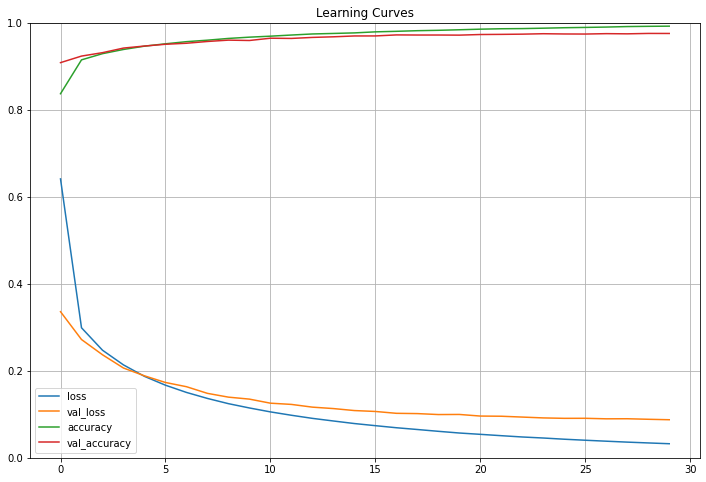

In [15]:
import pandas as pd
df_historial1=pd.DataFrame(model1.history.history)
df_historial1[['loss','val_loss','accuracy', 'val_accuracy']].plot(figsize=(12, 8),
                                                                  grid=True, 
                                                                  title="Learning Curves",
                                                                  ylim=(0,1));

#### Modelo 2: 300 Relu 200 Relu adam <a class="anchor" id="Modelo2"></a>

Arquitectura

In [16]:
model2 = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")
                                ])

Resumen

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compilo

In [18]:
model2.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

Entreno <a class="anchor" id="Fit2"></a>

In [19]:
history2 = model2.fit(X_val_train, y_val_train, epochs=30,
                    validation_data=(X_val_test, y_val_test))

Epoch 1/30
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2217 - accuracy: 0.9330 - val_loss: 0.1218 - val_accuracy: 0.9626
Epoch 2/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0897 - accuracy: 0.9722 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 3/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.0968 - val_accuracy: 0.9725
Epoch 4/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0441 - accuracy: 0.9859 - val_loss: 0.0826 - val_accuracy: 0.9775
Epoch 5/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 0.0786 - val_accuracy: 0.9792
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.1055 - val_accuracy: 0.9751
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.1160 - val_accuracy:

Learning curve <a class="anchor" id="Curve2"></a>

In [ ]:
df_historial2=pd.DataFrame(model2.history.history)
df_historial2[['loss','val_loss','accuracy', 'val_accuracy']].plot(figsize=(12, 8),
                                                                  grid=True, 
                                                                  title="Learning Curves",
                                                                  ylim=(0,1));

### Seleccion final de modelo y entrenamiento con todos los datos (X_train, y_train)  <a class="anchor" id="SeleccionFinal"></a>

De acuerdo a los resultados anteriores, se decide elegir el modelo de red neuronal con dos capas ocultas de 300 y 100 neuronas, con funcion de activacion relu, la capa de salida con softmax y el optimizer ADAM. <a class="anchor" id="ModeloFinal"></a>

Arquitectura

In [11]:
model_final = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")
                                ])

Resumen

In [12]:
model_final.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compilo

In [13]:
model_final.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

Entrenamiento

In [14]:
history_final = model_final.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3449 - accuracy: 0.9012
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0865 - accuracy: 0.9741
Epoch 3/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0543 - accuracy: 0.9830
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0382 - accuracy: 0.9877
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0308 - accuracy: 0.9898
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0245 - accuracy: 0.9922
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0219 - accuracy: 0.9929
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0138 - accuracy: 0.9961
Epoch 10/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.01

Curva de accuracy-loss <a class="anchor" id="Accuracy-Final"></a>

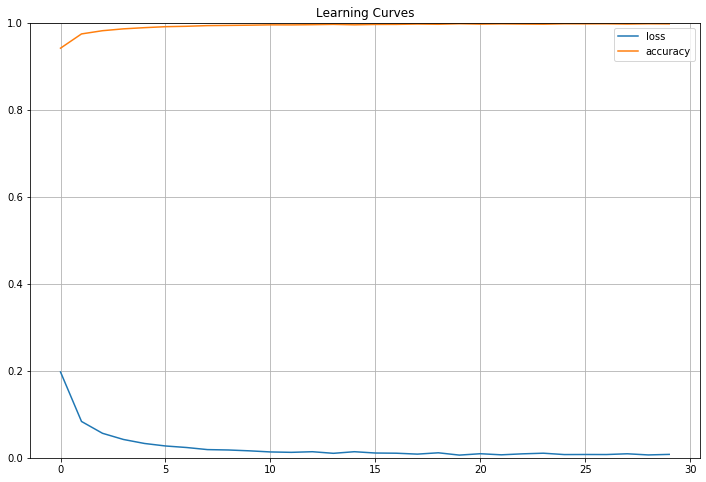

In [16]:
import pandas as pd
df_historial_final=pd.DataFrame(model_final.history.history)
df_historial_final[['loss','accuracy']].plot(figsize=(12, 8),
                                                                  grid=True, 
                                                                  title="Learning Curves",
                                                                  ylim=(0,1));

### Prediccion de resultados sobre las nuevas observaciones (X_test) <a class="anchor" id="Prediccion"></a> <a class="anchor" id="Predi1"></a>

In [17]:
predicciones=model_final.predict_classes(X_test)
predicciones

C:\Users\Mateio\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 9, 4, ..., 5, 9, 7], dtype=int64)

In [18]:
predicciones.shape

(10000,)

Guardo el resultado en el formato requerido  <a class="anchor" id="Guarda-npy">

In [19]:
np.save('Comba_1',predicciones)

### Guardar el modelo de produccion   <a class="anchor" id="Guarda-modelo">

In [ ]:
model_final.save('Produccion_1')